In [261]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt 

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
#from tensorflow.python.eager.monitoring import Metric


print(tf.keras.__version__)

2.8.0


In [262]:
#Cargando datos 
fashion_mnist = keras.datasets.fashion_mnist #no tiene metadatos por lo que se debe colocar las clases manualmente

In [263]:
#Separando datos de entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#cuando cambiamos la forma se cambia de numpy a EargTensor el cual no tiene el metodo.reshape
#por eso ahcemos una copia del original para imprimir las figuras
test_images_Ori = test_images

In [264]:
#como no tiene etiquetas las ingresamos manualmente 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

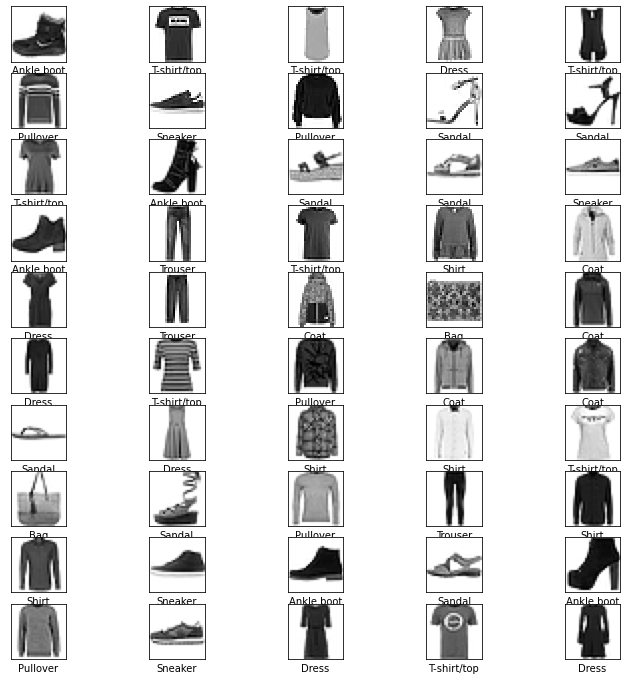

In [265]:
#Comprobar si las muestras y etiquetas con los valores que esperamos
train_labels

plt.figure(figsize=(12,12)) #tamaño de cada imagen o subgrafica
for i in range(50): 
  plt.subplot(10, 5, i+1) # 10 renglones de imagens y 5 imagenes por clumna
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [266]:
#Normalizar datos 0-1
def Normalizar(images):
  images = tf.cast(images, 'float32')
  images /= 255.0
  return images
  
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = Normalizar(train_images)

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = Normalizar(test_images)


#Buena practica comprobar la forma 
print("train_images.shape", train_images.shape)
print("len(train_labels)", len(train_labels))
print("test_amages.shape", test_images.shape)
print("len(test_labels)", len(test_labels))


train_images.shape (60000, 28, 28, 1)
len(train_labels) 60000
test_amages.shape (10000, 28, 28, 1)
len(test_labels) 10000


In [267]:
#Denifir el modelo
model = Sequential()
model.add(Conv2D(64, (5, 5), activation='relu', padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2)) #tamaño de ventana/matriz/filtro
model.add(Conv2D(128, (5, 5), activation='relu', padding="same"))
model.add(MaxPooling2D(2, 2)) #tamaño de ventana/matriz/filtro
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 6272)              0         
                                                                 
 dense_41 (Dense)            (None, 32)              

In [268]:
#Configurar el modelo
#optimizaer funcion para optimizar los pesos
#loss funcion de coste que dirige el entrenamiento a la direccion correcta
#durante el proceso de entrenamiento 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [269]:
#Entrenamiento del modelo
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 383s 204ms/step - loss: 0.4135 - accuracy: 0.8506
Epoch 2/5
1875/1875 [==============================] - 381s 203ms/step - loss: 0.2719 - accuracy: 0.9016
Epoch 3/5
1875/1875 [==============================] - 379s 202ms/step - loss: 0.2257 - accuracy: 0.9174
Epoch 4/5
1875/1875 [==============================] - 379s 202ms/step - loss: 0.1954 - accuracy: 0.9285
Epoch 5/5
1875/1875 [==============================] - 379s 202ms/step - loss: 0.1689 - accuracy: 0.9366


In [270]:
#Evaluacion del modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 18s 57ms/step - loss: 0.2402 - accuracy: 0.9162
Test accuracy:  0.9161999821662903


In [271]:
#Predicciones
#el modelo ya aplasta las entradas de 28,28 al num de neuronas d la ultima capa
predictions = model.predict(test_images)
print("forma que regresa model.predict: ", predictions.shape)



forma que regresa model.predict:  (10000, 10)


fomra test_images:  (10000, 28, 28, 1)
[5.4269913e-05 9.9929380e-01 2.7982205e-05 7.0201160e-05 5.3099525e-04
 5.3384576e-07 1.9202840e-05 5.4866285e-07 1.1766239e-06 1.3004069e-06]
1
Trouser


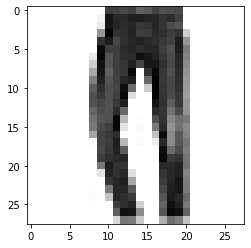

In [272]:
#la forma del predcir es el nuemro de la ultima capa de neuronas
print("fomra test_images: ", test_images.shape)
#de las imagenes de test tomamos la amtriz 5 para tener uan idea visual
plt.imshow(test_images_Ori[5], cmap=plt.cm.binary)

#Lo que nos predice el modelo
print(predictions[5])
print(np.argmax(predictions[5]))
print(class_names[np.argmax(predictions[5])])


In [273]:
#Funcion Extraida de Tensor flow
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00BF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

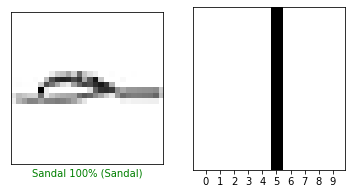

In [274]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images_Ori)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

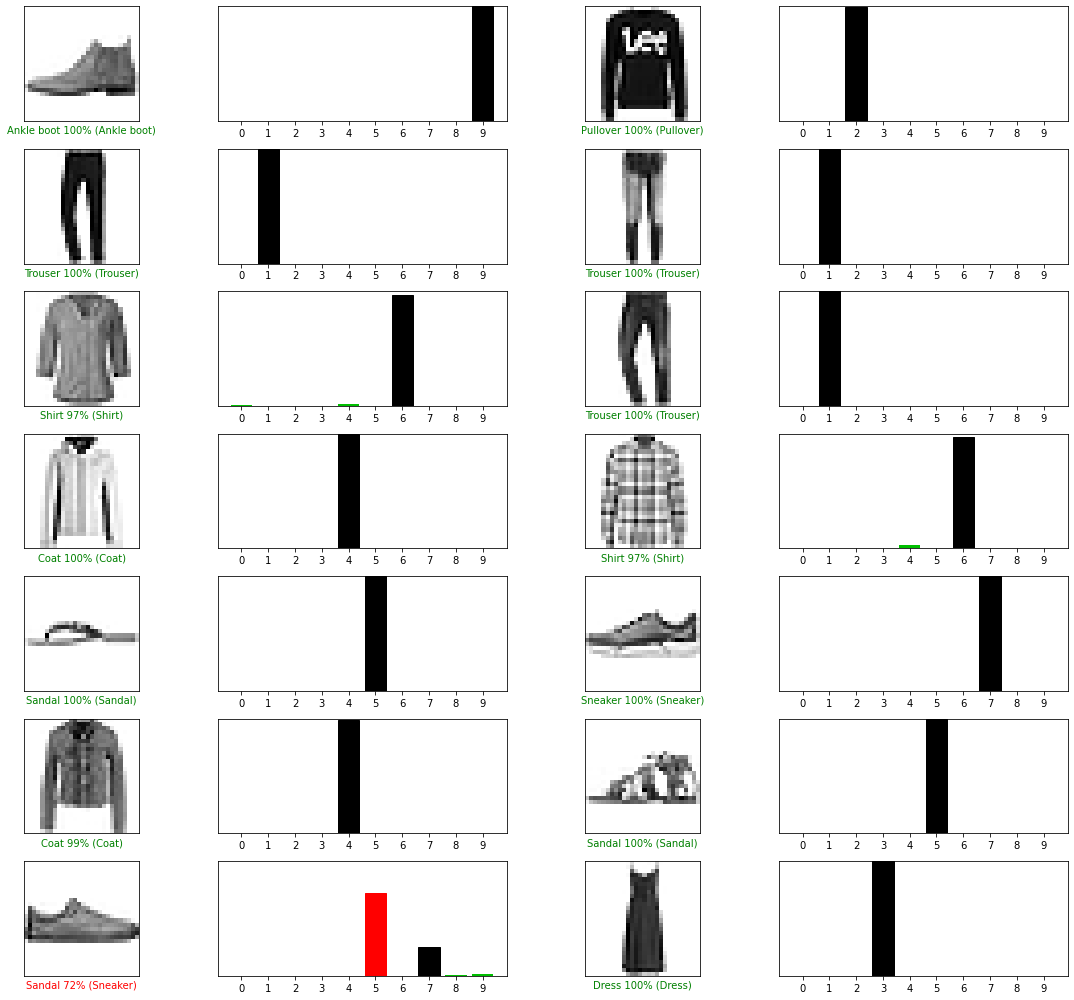

In [275]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(4*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images_Ori)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
